In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
def cal_loss_function(y,y_hat,lamd,W):
    temp = -np.mean((y.values*np.log(y_hat)+(1-y.values)*np.log(1-y_hat)), axis=0) + lamd*np.sum((W[1:]**2), axis=0)
    #print(temp)
    return temp

In [4]:
def cal_gradient_L2(y, y_hat,X):
    X = X[0:,1:]
    #print(X.shape)
    #print(y.shape)
    #print(y.shape)
    return np.dot(X.T,(y_hat-y.values))/y.shape[0] + 2*W[1:,]

In [5]:
def cal_update_w0(y, y_hat,X):
    #print((y_hat-y.values).mean(axis=0))
    return (y_hat-y.values).mean(axis=0)

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [7]:
data_iris = pd.read_csv('IRIS.csv')

In [8]:
data_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data_iris['species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

In [10]:
m = len(data_iris)
#print(m)

In [11]:
X = data_iris.iloc[:,:4].values
Y = pd.get_dummies(data_iris['species'])
#print(X)
#print("X:", X.shape)
#print("Y:", Y.shape)

In [12]:
#Y

In [13]:
scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)

In [14]:
#X

In [15]:
W_init = np.random.random((5,3))
W = W_init

In [16]:
#W[1:]

In [17]:
#print(X.shape)
#print(W.shape)

In [18]:
b = np.ones((150,1))
#print(b.shape)
X = np.hstack((b,X))
#print("X", X.shape)
#print("W", W.shape)

In [19]:
#X

In [20]:
#print("X", X.shape)

In [21]:
#f = X.dot(W)

In [22]:
#H = sigmoid(f)

In [23]:
#cal_cost=cal_cost_function(Y,H,150,0.005,W)

In [24]:
#gra = cal_gradient_L2(Y, H, X)
#gra

In [25]:
#W1 = W[1:,] - (1/150)*0.001*gra
#W1

In [26]:
#W[0:1]

In [27]:
#update = cal_update_w0(Y, H, X)
#W0 = W[0:1] - (1/150)*0.001*update
#W0

In [28]:
#W1

In [29]:
#W = np.vstack((W0,W1))
#W

# Normal Gradient descent

In [30]:
#W = W_init
epoch = 10000
history_loss = []
lamda = 1
lr = 0.01
#m= 150
for i in range(epoch):
    f = X.dot(W)
    H = sigmoid(f) 
    loss =cal_loss_function(Y,H, lamda,W)
    history_loss.append(loss) 
    update_w1 = cal_gradient_L2(Y, H, X)
    update_w0 = cal_update_w0(Y, H, X)
    W1 = W[1:,] - lr*update_w1
    W0 = W[0:1] - lr*update_w0
    W = np.vstack((W0,W1))

In [31]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(history_loss) + 1), history_loss)
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.title('Gradient Descent ')
plt.legend(['loss_1', 'loss_2', 'loss_3'])
plt.show()

<Figure size 640x480 with 1 Axes>

# Stochastic Gradient Descent

In [32]:
data_iris = pd.read_csv('IRIS.csv')
data_iris.head()
m = len(data_iris)
X = data_iris.iloc[:,:4].values
Y = pd.get_dummies(data_iris['species'])
scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)
#W = np.random.random((5,3))
W = W_init
b = np.ones((150,1))
X = np.hstack((b,X))

In [33]:
def cal_loss_function(y,y_hat,lamd,W):
    temp = -np.mean((y*np.log(y_hat)+(1-y)*np.log(1-y_hat)), axis=0) + lamd*np.sum((W[1:]**2), axis=0)
    #print(temp)
    return temp

In [38]:
def cal_gradient_L2(y, y_hat,X):
    X = X[0:,1:]
    #print(X.shape)
    #print(y.shape)
    #print(y_hat.shape)
    return np.dot(X.T,(y_hat-y))/y.shape[0] + 2*W[1:,]

In [39]:
def cal_update_w0(y, y_hat,X):
    #print((y_hat-y.values).mean(axis=0))
    return (y_hat-y).mean(axis=0)

In [40]:
#W = W_init
epoch =1000
history_loss = []
lamda = 1
lr = 0.001
batch = 20
for i in range(epoch):
    index = np.random.permutation(len(Y))
    index = index[:batch]
    rand_X = X[index,:]
    rand_Y = Y.values[index]
    f = rand_X.dot(W)
    H = sigmoid(f) 
    loss =cal_loss_function(rand_Y,H, lamda,W) 
    update_w1 = cal_gradient_L2(rand_Y, H, rand_X)
    update_w0 = cal_update_w0(rand_Y, H, rand_X)
    W1 = W[1:,] - lr*update_w1
    W0 = W[0:1] - lr*update_w0
    W = np.vstack((W0,W1))
    history_loss.append(loss)

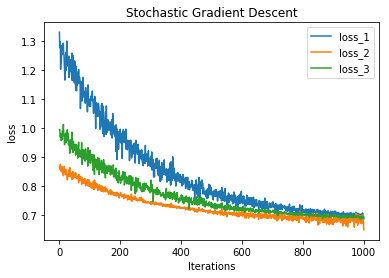

In [41]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(history_loss) + 1), history_loss)
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.title('Stochastic Gradient Descent')
plt.legend(['loss_1', 'loss_2', 'loss_3'])
plt.show()